In [1]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


rate_jac (generic function with 1 method)

In [2]:
using JLD2, CairoMakie, GLMakie

In [39]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\")
len = 100
map_dim = " $(len)x$(len) "
name = " γY IE rate_model params from article RK4"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

Λs = load(namefile_LSE)
Λs = Λs["Λs"]
u0s = load(namefile_u0s)
u0s = u0s["u0s"]

γYrange = range( 0.0, 10.0, length = len );
IErange = range(0.0, 2.0, length = len);

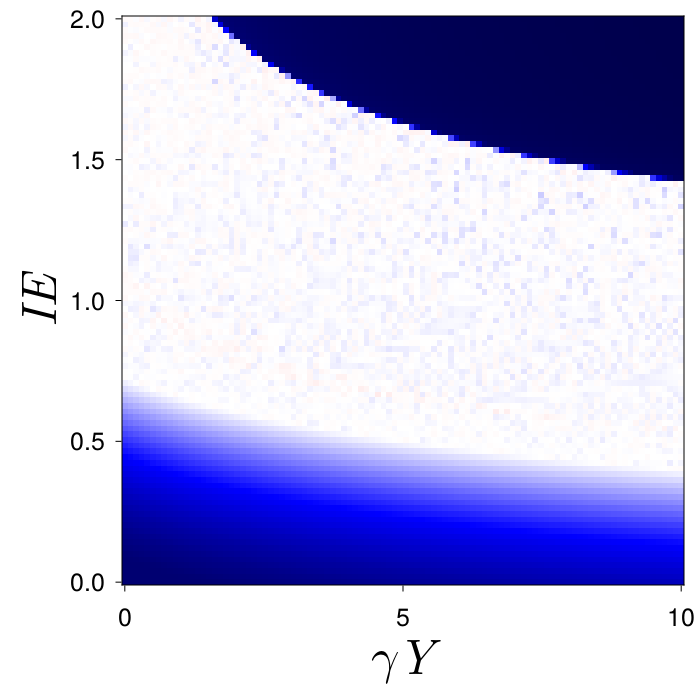

In [40]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

CairoMakie.activate!()
f = Figure(resolution = (700, 700))
ticksize = 25
tickpad = 10.0
textsize = 25

ax = Axis(f[1, 1], xlabel = L"γY",ylabel = L"IE", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax, γYrange, IErange, Λs[:, :, index],
colormap = :seismic, colorrange = (mn, mx))

display(f);

In [11]:
findmax(Λs[:, :, 1])

(0.0, CartesianIndex(2, 1))

In [54]:
γYrange[77], IErange[24]

(7.6767676767676765, 0.46464646464646464)

In [57]:
println(u0s[77, 24, :])

[0.16045609000311886, 0.3850432296357792, 0.0019933948171139797, 0.023069376188863726, 1.784633593169302e-19]


In [38]:
GLMakie.activate!()
display(GLMakie.Screen(), f);

In [57]:
""""pathtosave = "C:\\Users\\HOME\\Desktop\\"
filename = "\\map_zoom.eps"
fullpath = pathtosave * filename 
save(fullpath, f)""""

CairoMakie.Screen{EPS}
